# Lesbarhetsindekser

Lesbarhetsindeksen fra [Wikipedia](https://no.wikipedia.org/wiki/Lesbarhetsindeks) har formelen

LIX = $\frac{A}{B}+\frac {C*100}{A}$

A = Antall ord
B = Antall setningsterminatorer (punktum, kolon, stor forbokstav)
C = Antall lange ord (flere enn 6 bokstaver)

Standardisert typen/token-ratio er antall løpende ord i teksten sammenlignet med antall ordformer. Standardisering betyr at ratioen beregnes som et gjennomsnitt av utdrag.

STTR = $\frac {\sum_{p \in M} \frac{|O \in p|}{|T \in p|}}{|M|}$

Der $M$ er en partisjon av teksten, som deler opp teksten i passe størrelser, for eksempel 5000 ord i gangen.

Vi kan beregne LIX utover i teksten også, så det går an å se om den indeksen endrer seg




In [4]:
import dhlab as dh
import pandas as pd
import dhlab.api.dhlab_api as api


In [5]:
def ttr(text):
    """Given part of a text as a pandas series compute ttr
    make sure to check for zeros, since the series may come from a larger frame
    with huge index length"""
    
    types = len(text[text>0])
    words = text.sum()
    return types/words

def sttr(information):
    """A dataframe with text parts in columns but information can be a URN"""
    if isinstance(information, str):
        # this is URN
        chunking = pd.DataFrame(dh.Chunks(information, chunks = 5000).chunks).transpose().fillna(0)
    else:
        print('hmmm - prøv med en annen type')
    return (information, chunking.apply(ttr).mean())

def lix(urn, punkt=['.',':','?','!'], length_cutoff = 6):
    """Comput LIX readability index"""
    a = api.get_document_frequencies(urns=[urn], cutoff=0)
    A = a.sum()
    try:
        B = a.loc[punkt].sum()
    except:
        B = 1
    try:
        C = a.groupby(lambda x: len(x) >= length_cutoff).count().loc[True]
    except:
        C = 0
    return (A/B)+100*(C/A)

def sentence_length(urns):
    if isinstance(urns, str):
        urnlist = [urns]
    elif isinstance(urns, pd.DataFrame):
        urnlist = list(urns.urn.values)
    elif isinstance(urns, dh.Corpus):
        urnlist = list(urns.frame.urn.values)
    else:
        urnlist = []
    a = api.get_document_frequencies(urns=urnlist, words = ['.',':','?','!'])['relfreq']
    return 1/a.sum()

# Forskjellige korpus

In [3]:
corpus = dh.Corpus(author="defoe", title='robinson', to_year = 1840).frame

In [4]:
corpus

,dhlabid,urn,title,authors,oaiid,sesamid,isbn10,city,timestamp,year,publisher,langs,subjects,ddc,genres,literaryform,doctype,ocr_creator,ocr_timestamp
0,100633666,URN:NBN:no-nb_digibok_2016110226001,"Robinson Crusoes mærkværdige Hændelser, Reiser...","Pettersen , Petter Michael / Defoe , Daniel / ...",oai:nb.bibsys.no:999919856293502202,5a62c61d7e993c7966a88a9eeaf278b4,,,18390101,1839,Trykt i Forlæggerens Officin ved P.T. Malling,dan / eng,Engelsk litteratur,,novel,Skjønnlitteratur,digibok,dhlab,20221209
1,100493336,URN:NBN:no-nb_digibok_2016110226001,"Robinson Crusoes mærkværdige Hændelser, Reiser...","Pettersen , Petter Michael / Defoe , Daniel / ...",oai:nb.bibsys.no:999919856293502202,5a62c61d7e993c7966a88a9eeaf278b4,,,18390101,1839,Trykt i Forlæggerens Officin ved P.T. Malling,dan / eng,Engelsk litteratur,,novel,Skjønnlitteratur,digibok,nb,20060101


In [6]:

def sent_length_change(year=1800, step=20, sample_size=100, doctype='digibok'):
    df = pd.DataFrame()
    for year in range(year, 2020, step):
        #print(year)
        sr = pd.DataFrame(sentence_length(dh.Corpus(doctype=doctype,from_year=year, order_by='random', to_year = year + step, limit= sample_size)))
        sr['year'] = year
        df = pd.concat([df, sr])
    return df.groupby('year')[0].mean()

In [7]:
runs = [sent_length_change(year=1780, doctype='digibok', sample_size=400, step=20) for i in range(10)]

In [8]:
#runs_avis = [sent_length_change(1800, doctype='digavis', sample_size=300, step=10) for i in range(10)]

<AxesSubplot: xlabel='year'>

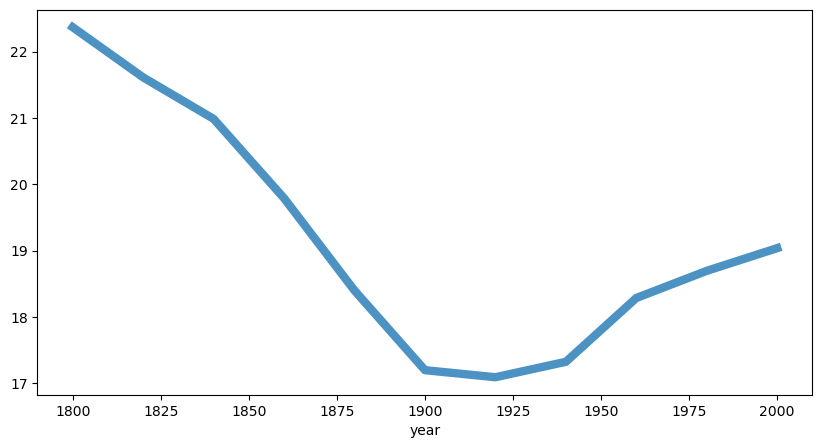

In [12]:
(
    pd.concat(runs, axis = 1)
         .mean(axis=1)
         .plot(lw=6, alpha=.8, figsize=(10,5),legend=False)
)

In [20]:
a = pd.concat(runs, axis = 1)

In [21]:
a

,0,0,0,0,0,0,0,0,0,0
year,,,,,,,,,,
1800,21.489895,22.692260,22.829984,22.453000,21.748574,21.838962,22.724362,22.528831,23.303916,22.071035
1820,21.940849,21.040234,22.159398,22.519334,20.859017,21.393504,21.893400,21.738717,21.219809,21.353131
1840,20.591885,21.401186,20.922884,21.265389,21.373048,20.031872,21.249335,20.750224,21.728279,20.550274
1860,20.184289,19.733347,20.090898,20.254140,19.337464,20.250746,18.983220,19.315774,19.699330,20.054802
1880,18.020023,18.285440,18.311257,18.696669,18.356932,18.580222,18.687205,18.412506,18.084543,18.554125
1900,17.259376,17.282413,17.279931,17.466150,17.185632,17.095952,16.687855,17.430963,17.049230,17.246375
1920,16.337225,18.449746,16.444264,18.806659,17.007056,16.411057,17.697080,17.578199,16.195881,15.994168
1940,16.915163,16.204427,16.230177,16.297787,22.901383,16.479455,16.856795,16.420327,16.808616,18.133274
1960,16.336805,17.687655,18.114723,19.792395,16.686178,17.427763,23.241806,18.907711,16.835352,17.837747


In [41]:
df = a.transpose().describe().transpose()
df

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1800,10.0,22.368082,0.565433,21.489895,21.896980,22.490915,22.716337,23.303916
1820,10.0,21.611739,0.525859,20.859017,21.253139,21.566111,21.928987,22.519334
1840,10.0,20.986438,0.509432,20.031872,20.631470,21.086110,21.346133,21.728279
1860,10.0,19.790401,0.451644,18.983220,19.427930,19.894075,20.160941,20.254140
1880,10.0,18.398892,0.234195,18.020023,18.291894,18.384719,18.573698,18.696669
1900,10.0,17.198388,0.220874,16.687855,17.118372,17.252875,17.281792,17.466150
1920,10.0,17.092134,0.991881,15.994168,16.355683,16.725660,17.667360,18.806659
1940,10.0,17.324740,2.039773,16.204427,16.328422,16.644036,16.900571,22.901383
1960,10.0,18.286813,2.027691,16.336805,16.983455,17.762701,18.709464,23.241806


# Plot med feilmarginer

In [45]:
df['lower'] = df['mean'] - df['std']
df['upper'] = df['mean'] + df['std']

In [49]:
import matplotlib.pyplot as plt

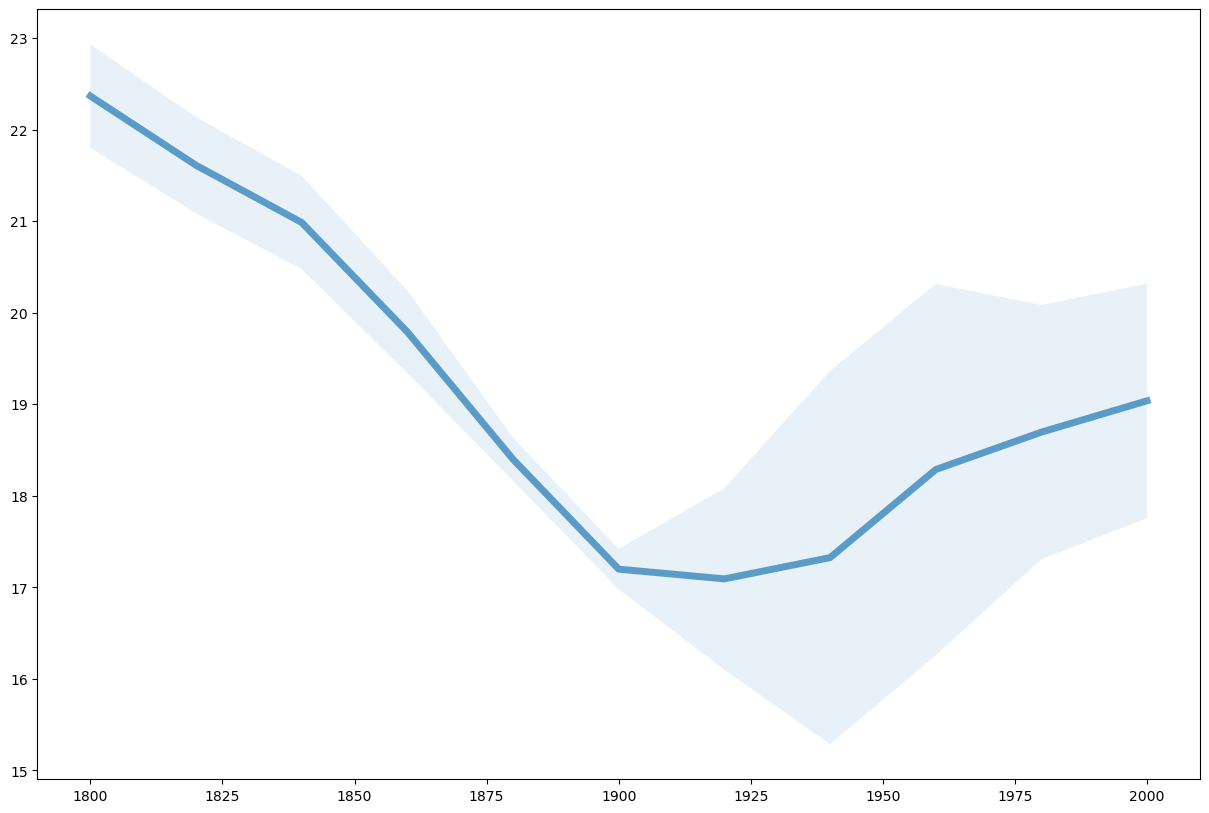

In [59]:
x = df.index
y = df['mean']
y_lower = df['lower']
y_upper = df['upper']
fig, ax = plt.subplots()
ax.fill_between(x, y_lower, y_upper, alpha=0.1)
ax.plot(x, y, '-', color='tab:blue', lw=5, alpha=0.7)

<AxesSubplot: xlabel='year'>

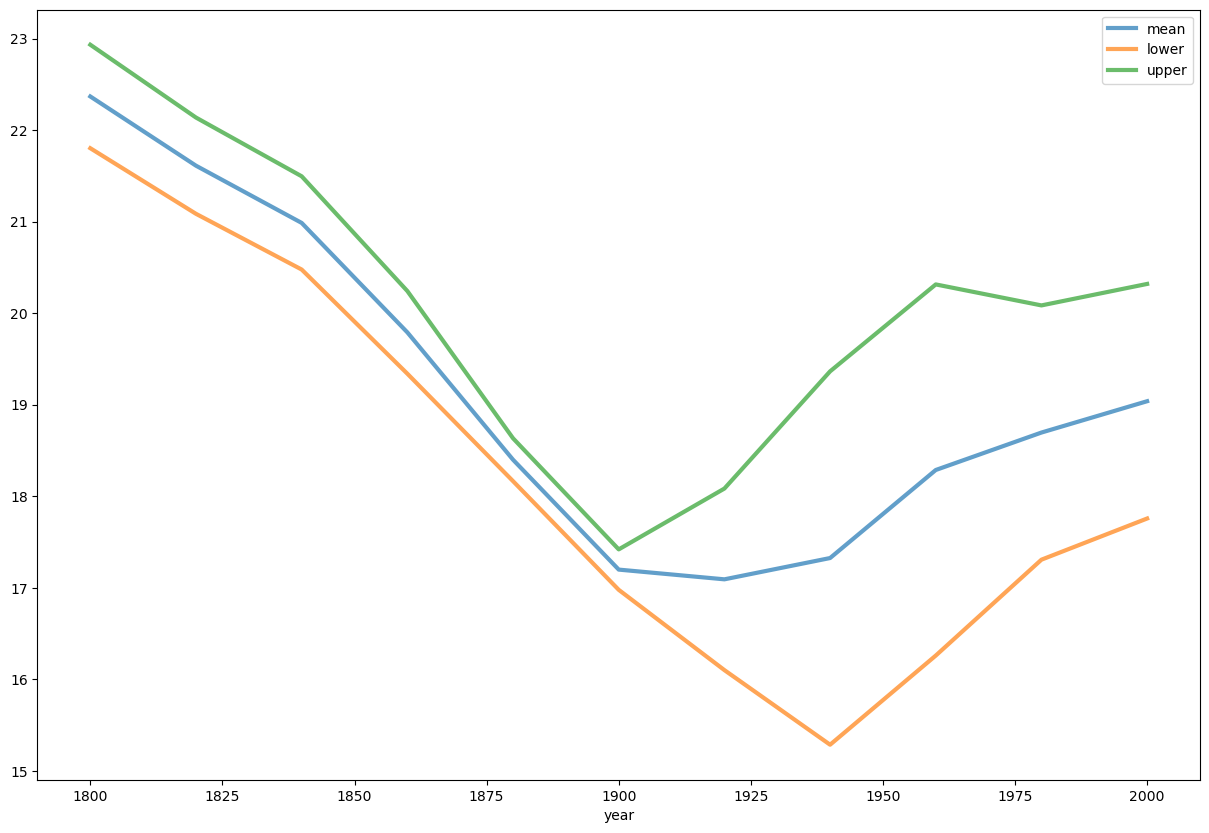

In [46]:
df[['mean', 'lower','upper']].plot(lw=3, alpha=.7)
 

In [31]:
a.transpose().describe()

year,1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,22.368082,21.611739,20.986438,19.790401,18.398892,17.198388,17.092134,17.324740,18.286813,18.695956,19.038284
std,0.565433,0.525859,0.509432,0.451644,0.234195,0.220874,0.991881,2.039773,2.027691,1.389100,1.281536
min,21.489895,20.859017,20.031872,18.983220,18.020023,16.687855,15.994168,16.204427,16.336805,17.291559,17.776197
25%,21.896980,21.253139,20.631470,19.427930,18.291894,17.118372,16.355683,16.328422,16.983455,18.202191,18.027060
50%,22.490915,21.566111,21.086110,19.894075,18.384719,17.252875,16.725660,16.644036,17.762701,18.340860,18.750909
75%,22.716337,21.928987,21.346133,20.160941,18.573698,17.281792,17.667360,16.900571,18.709464,18.549876,19.551446
max,23.303916,22.519334,21.728279,20.254140,18.696669,17.466150,18.806659,22.901383,23.241806,22.171037,21.993083


<AxesSubplot: xlabel='year'>

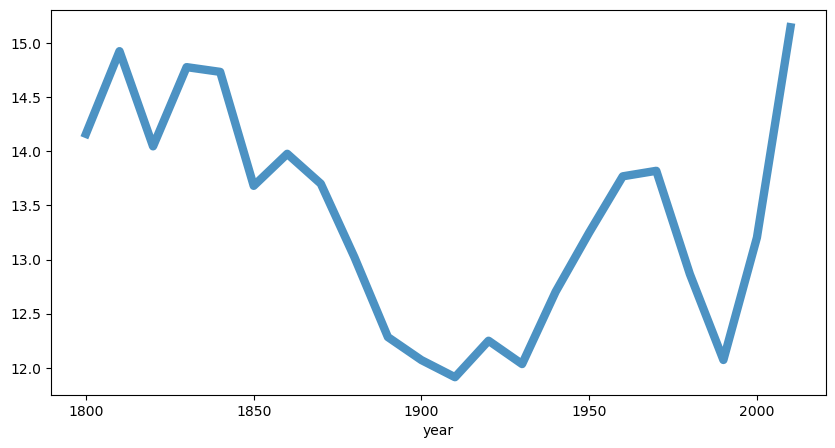

In [134]:
(
    pd.concat(runs_avis, axis = 1)
         .loc[1800:]
         .mean(axis=1)
         .plot(lw=6, alpha=.8, figsize=(10,5),legend=False)
)

<AxesSubplot: xlabel='year'>

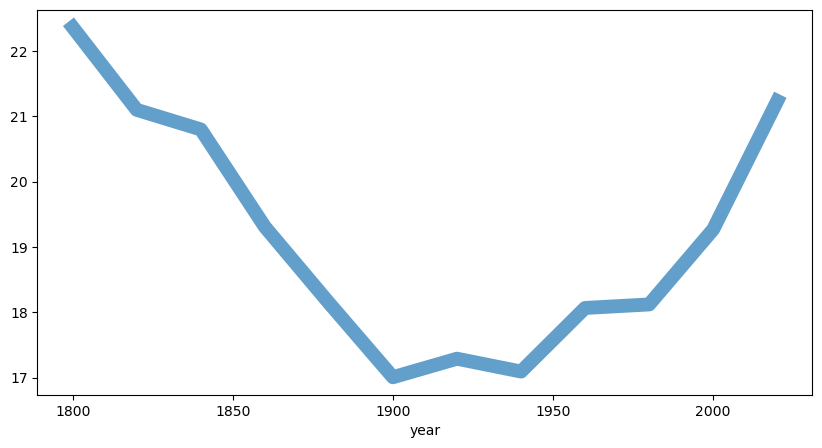

In [131]:
all_runs_2.loc[1800:].mean(axis=1).plot(lw=10, alpha=.7, figsize=(10,5),legend=False)

<AxesSubplot: xlabel='year'>

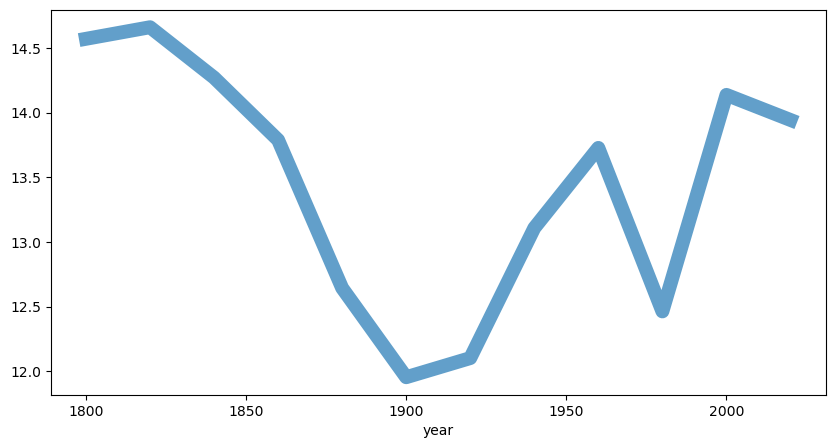

In [116]:
all_runs_3.mean(axis=1).plot(lw=10, alpha=.7, figsize=(10,5),legend=False)

In [6]:
def sample():
    authors = dh.Corpus()
    for x in ["vigdis hjorth","roy jacobsen", "kjartan fløgstad", "helene uri","jon fosse", "ole robert sunde","arne næss","karl marx" "torbjørn egner", "anne* vestly"]:
        authors.add(dh.Corpus(author=x, lang='nob').sample(1))
    return authors

In [7]:
def lix_all(corpus):
    m = pd.DataFrame(corpus.frame['urn'].apply(lix).transpose().sum(axis=1), columns=['lix']).reset_index()
    return corpus.frame.merge(m, left_on='dhlabid', right_on='index')[['title',"authors","lix"]].sort_values(by='lix')

In [8]:
lix_all(sample())

,title,authors,lix
7,Trofaste Knerten,"Vestly , Anne-Cath. / Vestly , Johan / Samuels...",19.579906
0,Bitt av basillen,"Lind , Lydia / Hjorth , Vigdis / Vatle , Sylve...",21.976943
6,Filosofiens historie : en innføring i filosofi...,"Næss , Arne",27.674594
3,(Nesten) alt du trenger å vite om norsk : 52 o...,"Uri , Helene",28.278876
1,Hoggerne : roman,"Jacobsen , Roy",32.089017
2,Nordisk fantasi : en essaysamling,"Rønning , Helge / Linneberg , Arild / Sætre , ...",36.627609
4,Svevn,"Fosse , Jon / Bergan , Alexander / Skare , Ola...",40.412552
5,En ordinær høyde : roman,"Sunde , Ole Robert",166.076986


In [30]:
def sttr_all(corpus):
    data = pd.DataFrame(list(corpus.frame.urn.apply(sttr)), columns=['urn', 'sttr'])
    return corpus.frame.merge(data, left_on='urn', right_on='urn')[['title',"authors","sttr"]].sort_values(by='sttr')

In [31]:
sttr_all(sample())

,title,authors,sttr
7,Trofaste Knerten,"Vestly , Anne-Cath. / Vestly , Johan",0.173030
4,Dikt : 1986-2000,"Fosse , Jon",0.259597
1,Frost : roman,"Jacobsen , Roy",0.266225
0,Noveller i utvalg,"Ditlevsen , Tove / Hjorth , Vigdis / Lyng , Hilde",0.272933
3,Den rettferdige : roman,"Uri , Helene",0.275614
5,Selvomsorg : prosa,"Sunde , Ole Robert",0.279319
2,Skriftfest Einar Økland 70,"Vold , Jan Erik / Solstad , Dag / Økland , Ein...",0.334852
6,Gandhi og atomalderen,"Næss , Arne",0.363952


In [29]:
pd.DataFrame(list(a.frame.urn.apply(sttr)), columns=['urn', 'sttr'])

,urn,sttr
0,URN:NBN:no-nb_digibok_2012070506029,0.266314
1,URN:NBN:no-nb_digibok_2015052608113,0.294360
2,URN:NBN:no-nb_digibok_2012042708096,0.303609
3,URN:NBN:no-nb_digibok_2014061706080,0.285297
4,URN:NBN:no-nb_digibok_2008111700018,0.259597
5,URN:NBN:no-nb_digibok_2007112701016,0.291385
6,URN:NBN:no-nb_digibok_2015013008033,0.299106
7,URN:NBN:no-nb_digibok_2009041600050,0.256885


In [210]:
lix_all(sample())

,title,authors,lix
4,Aurora i blokk Z,"Vestly , Anne-Cath.",19.478181
1,Det kan komme noen : noveller,"Jacobsen , Roy",23.366178
0,Med hånden på hjertet,"Hjorth , Vigdis",24.690849
3,De beste blant oss : roman,"Uri , Helene",28.961673
2,Min Buick er lastet med : dikt og fargefotogra...,"Christensen , Lars Saabye / Stalsberg , Tom / ...",41.158288


In [211]:
lix_all(sample())

,title,authors,lix
3,Fordi jeg elsker deg,"Uri , Helene",17.662631
4,Aurora i Holland,"Vestly , Anne-Cath. / Vestly , Johan",20.100134
1,Det nye vannet : roman,"Jacobsen , Roy",21.606323
0,Fordeler og ulemper ved å være til : roman,"Hjorth , Vigdis",26.572136
2,Eld og vatn : Kjartan Fløgstads Sauda,"Hermansen , Pål / Fløgstad , Kjartan",30.474350


In [212]:
lix_all(sample())

,title,authors,lix
0,Om bare : roman,"Hjorth , Vigdis",19.611432
4,Knerten på sykkeltur,"Vestly , Anne-Cath. / Samuelsen , Svein / Vest...",20.033493
1,Frost : roman,"Jacobsen , Roy",26.717825
3,Latin for begynnere,"Uri , Helene / Østmoe , Tor Ivar",30.263228
2,Nordisk fantasi : en essaysamling,"Rønning , Helge / Linneberg , Arild / Sætre , ...",36.627609


In [213]:
lix_all(sample())

,title,authors,lix
0,Jørgen + Anne er sant,"Hjorth , Vigdis / Bjone , Elisabeth Vold",15.390406
4,Mormor og de åtte ungene i skogen,"Vestly , Anne-Cath. / Vestly , Johan",19.426087
1,Hjertetrøbbel : roman,"Jacobsen , Roy",19.587388
3,"Språkmagi : fakta, historie, moro, kunnskap, g...","Uri , Helene",25.689332
2,Pablo Neruda,"Skei , Hans H. / Fløgstad , Kjartan / Viken , ...",43.578781


In [216]:
lix_all(sample())

,title,authors,lix
7,Ole Aleksander får skjorte,"Vestly , Anne-Cath. / Vestly , Johan",17.902784
3,Den store faktaboka om språk,"Uri , Helene",22.770050
0,Hjulskift : roman,"Hjorth , Vigdis",23.671970
1,Den høyre armen,"Jacobsen , Roy",24.318322
2,Grand Manila : roman,"Fløgstad , Kjartan",29.013981
4,"OL på hjemmebane : bakgrunn, fakta, oppgaver :...","Jevne , Ragnvald / Fosse , Jon",29.454666
6,Vinger Sparebank : 1851-1926 : jubileumsskrift,"Næss , Arne",34.116566
5,All verdens småting : prosa,"Sunde , Ole Robert",14900.701505


In [217]:
lix_all(sample())

,title,authors,lix
7,Til Huttetuenes land,"Sendak , Maurice / Vestly , Anne-Cath.",16.975593
1,Det kan komme noen : noveller,"Jacobsen , Roy",23.366178
0,Hjulskift : roman,"Hjorth , Vigdis",23.652105
3,Hårfint,"Mikkelsen , Trine / Uri , Helene",30.960735
2,Samlede dikt 1973-2004,"Aamodt , Bjørn / Fløgstad , Kjartan",32.415435
6,Vinger Sparebank : 1851-1926 : jubileumsskrift,"Næss , Arne",34.116566
5,Anne Biringvad : bildets bilde : malerier 2009...,"Biringvad , Anne / Lande , Odd Arne / Sunde , ...",1505.271505
4,Besøk : av Jon Fosse,"Fosse , Jon / Lunde , Hege / Broch , Kirsten /...",1938.020855


In [218]:
lix_all(sample())

,title,authors,lix
7,Ole Aleksander på skolen,"Vestly , Anne-Cath. / Vestly , Johan",20.317477
3,Kjerringer : roman,"Uri , Helene",21.395246
1,Ismael : roman,"Jacobsen , Roy",21.631960
6,Filosofiens historie : en innføring i filosofi...,"Næss , Arne",24.478362
0,"Takk, ganske bra : en norsk roman i tre deler","Hjorth , Vigdis",25.547751
4,Jon Fosse,"Huseby , Elin / Nielsen , Henrik Kiiehn / Foss...",28.812613
2,Virkelighetens ørken : artikler om den globale...,"Žižek , Slavoj / Fløgstad , Kjartan / Søbye , ...",38.740810
5,Jeg er som en åpen bok : roman,"Sunde , Ole Robert",205600.802728


In [33]:
t = sample()
c = sttr_all(t)
l = lix_all(t)


In [41]:
(
    c.merge(l, left_on='title', right_on='title')[['title','authors_x','lix','sttr']]
    .sort_values(by='sttr')
    .style.background_gradient(axis=0)
)

,title,authors_x,lix,sttr
0,Kant,"Elers-Jarleman , Agneta / Fosse , Jon / Edander , Gunnar / Lien , Ingvild Marie",16.925677,0.220383
1,Hysj,"Hjorth , Vigdis",22.545130,0.271480
2,Hvorfor er vannet vått?,"Sunde , Ole Robert / Gaustad , Bo",23.955324,0.280184
3,Det nye vannet : roman,"Jacobsen , Roy / Rottem , Øystein",22.691599,0.286085
4,Perler for svin,"Uri , Helene / Aalbu , Ragnar",36.573634,0.333233
5,Barn i Oslo : en billedkavalkade : barn i hovedstaden før og nå,"Schulerud , Mentz / Vestly , Anne-Cath. / Schulerud , Mentz",28.126864,0.336544
6,Pantagruel ; Gargantua,"Rabelais , François / Ringen , Erik / Fløgstad , Kjartan",31.634534,0.338511
7,En time med Arne Næss,"Næss , Arne",28.610083,0.366344


In [42]:
t = sample()
c = sttr_all(t)
l = lix_all(t)


(
    c.merge(l, left_on='title', right_on='title')[['title','authors_x','lix','sttr']]
    .sort_values(by='sttr')
    .style.background_gradient(axis=0)
)

,title,authors_x,lix,sttr
0,Guro og Frydefoniorkesteret,"Vestly , Anne-Cath. / Vestly , Johan",22.463525,0.193570
1,Mental håndbak : små samtaler om store spørsmål,"Næss , Arne",22.609494,0.265017
2,Continuum : vevde miniatyrer = woven miniatyres,"Aalberg , Solveig / Aalberg , Solveig / Sunde , Ole Robert / Haugerud , Halvard / Jørgensen , Erik Sæter / Malme , Hilde / Jortveit , Anne Karin",40.347330,0.265719
3,Rydde ut : roman,"Uri , Helene",23.086443,0.307706
4,Grenser : roman,"Jacobsen , Roy",40.327598,0.312065
5,"Veien langs linjene, eller Hvordan vi ble forfattere","Kittelsen , Erling / Økland , Einar / Steen , Thorvald / Kjærstad , Jan / Dahle , Gro / Hovland , Ragnar / Hjorth , Vigdis / Haugen , Tormod / Nysted , Liv / Lie , Sissel",34.012967,0.325276
6,Brasil 2014,"Fløgstad , Kjartan / Nore , Aslak",30.376293,0.392795
7,"Nora : too late : opera i én akt : komponist Du Wei, librettist Jon Fosse","Wei , Du / Fosse , Jon / Eide , Pjokken / Ibsen , Henrik",46.894491,0.402065
